# Ryan Moore - BIOS 512 Final Project

#### My final project utilizes data from FiveThirtyEight regarding the majors individuals either currently have in university or have on their degrees from when they attended university. Particularly at an institution such as UNC, there are frequent discussions regarding job searches and what positions one's field of study qualifies them for.

#### One such point of recent debate, which is both subtly reinforced and stated outright, is the emerging dominance of STEM in education. Among factors included in many individuals' decisions to obtain STEM degrees is the cultural emphasis and 'prestige' placed on STEM, as well as the perceived increased likelihood of employment after college. The perceived higher financial compensation when they do obtain these jobs is also a factor in many individuals' decisions to pursue STEM careers. With this project, I am seeking to investigate the impact a major's popularity or prevalence in the world has on such factors as unemployment and salary.

### First, we will load in tidyverse.

In [6]:
library('tidyverse')

#### Then, we will read in the dataset from FiveThirtyEight with statistics on various majors and their salaries.

In [7]:
majors = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv')
#this is the source for my data

majors |> head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.02614711,50000,34000,80000
2,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.02863606,54000,36000,80000
3,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.03024832,63000,40000,98000
4,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.04267890,46000,30000,72000
5,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.04918845,62000,38500,90000
6,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.03179089,50000,35000,75000


## What are the most popular majors? Let's make a bar chart that shows us the top 10 majors present among all age groups.

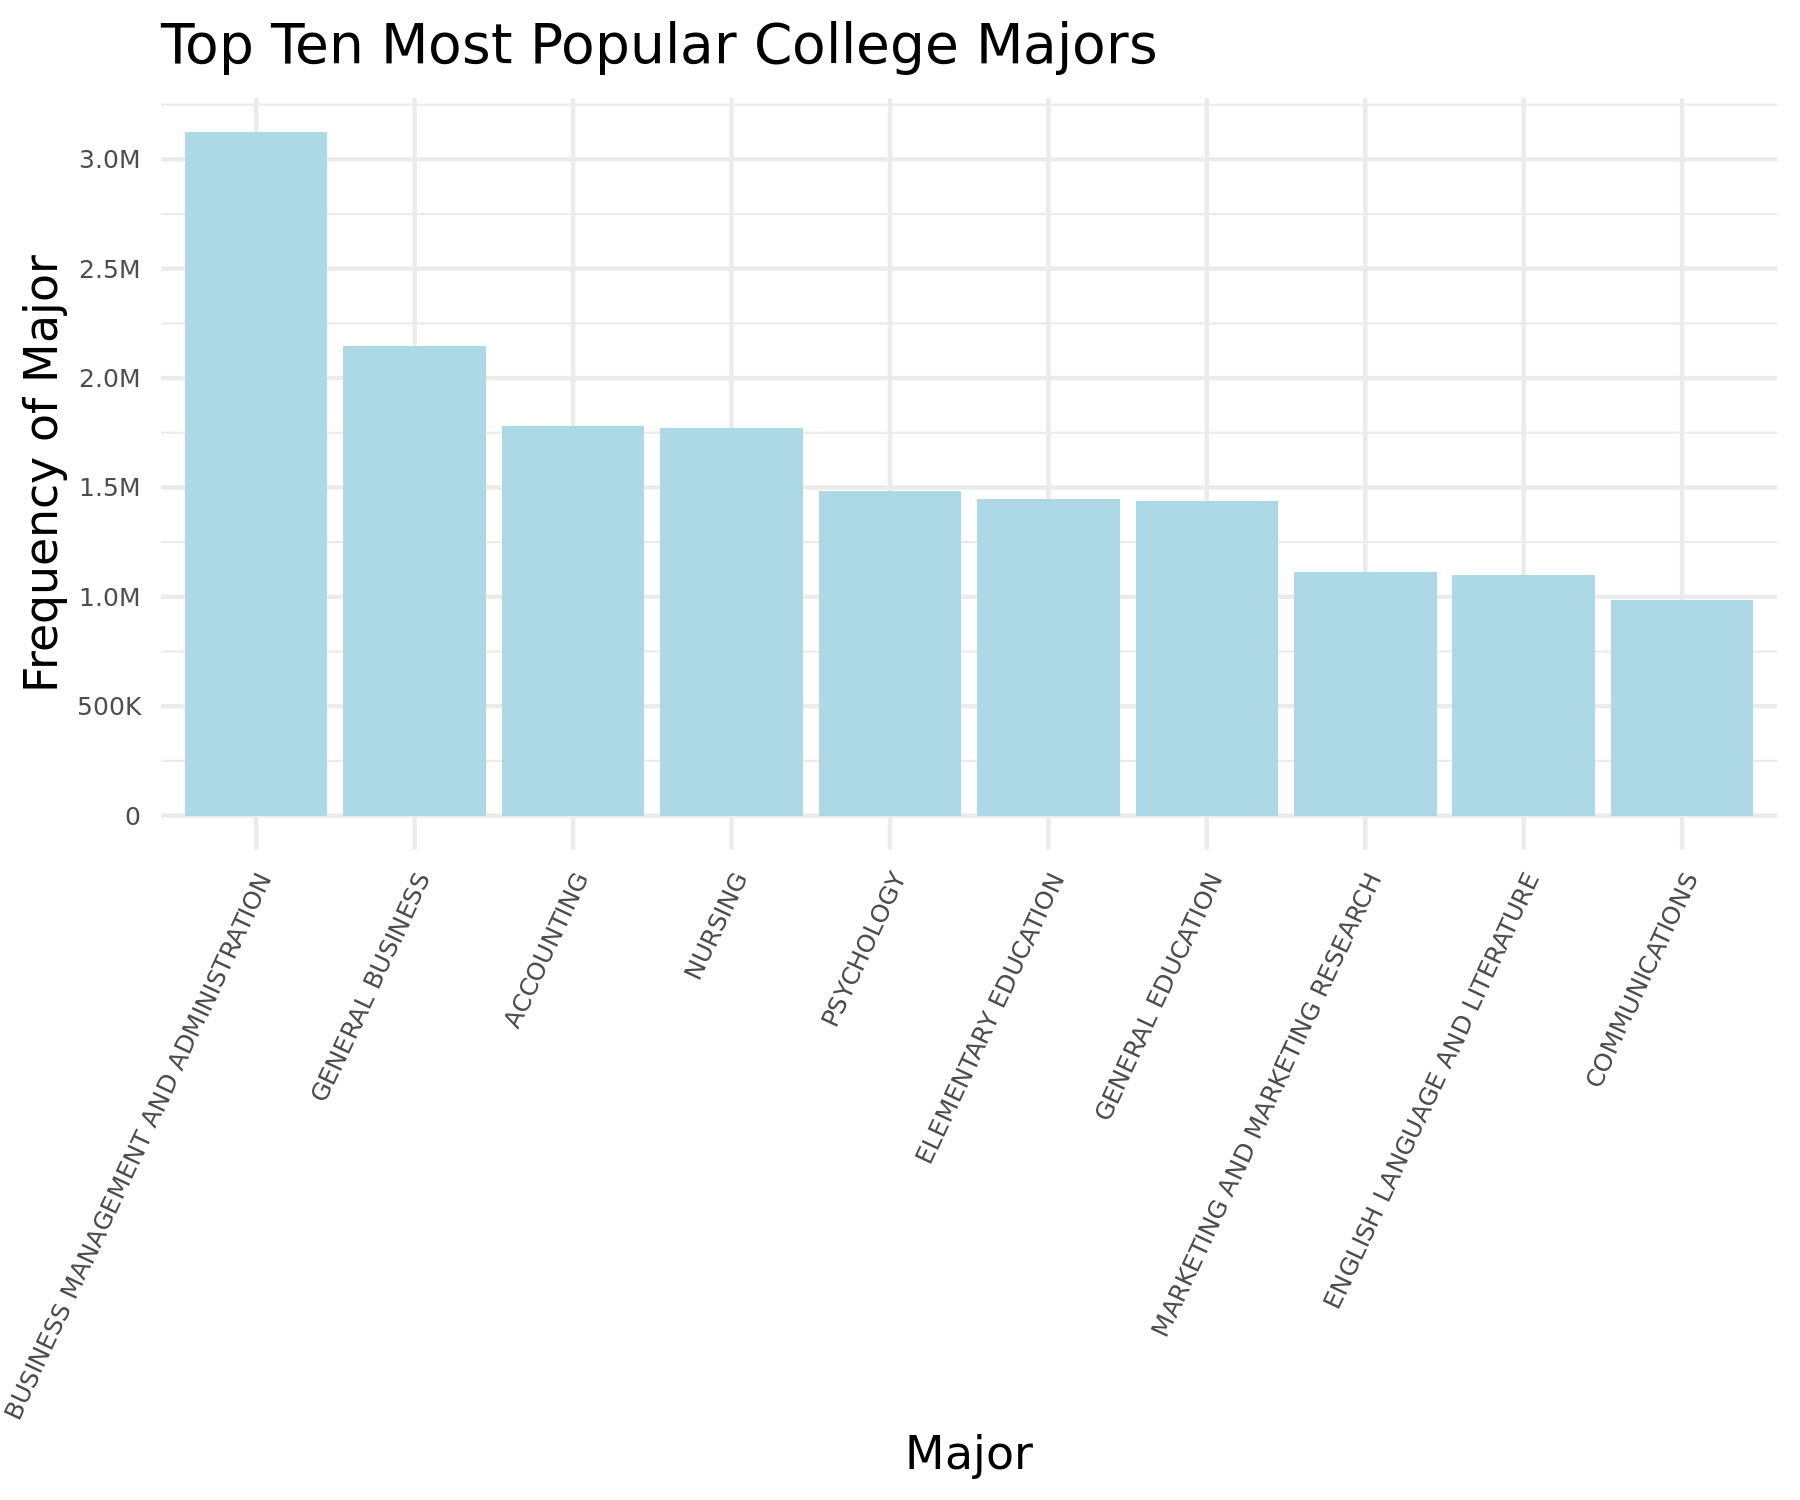

In [9]:
options(repr.plot.width=6, repr.plot.height=5, repr.plot.res = 300)

#filtering the top 10 majors to be graphed
top_10 <- head(majors[order(majors$Total, decreasing = TRUE), ], 10)

popular = ggplot(top_10, aes(x = reorder(Major, -Total),
                           y = Total)) +
  geom_bar(stat = "identity", fill = 'light blue') +
  labs(title = "Top Ten Most Popular College Majors",
       x = "Major",
       y = "Frequency of Major") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 65, hjust = 1)) +
    scale_y_continuous(breaks = seq(0, max(top_10$Total), by = 500000),labels = scales::label_number_si())+
    theme(axis.text = element_text(size = 6))
                   
popular

## Does choosing one of these more popular majors carry a higher risk of unemployment? Let's make a scatter plot and see where the line of best fit ends up to help inform our answer to this question.

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


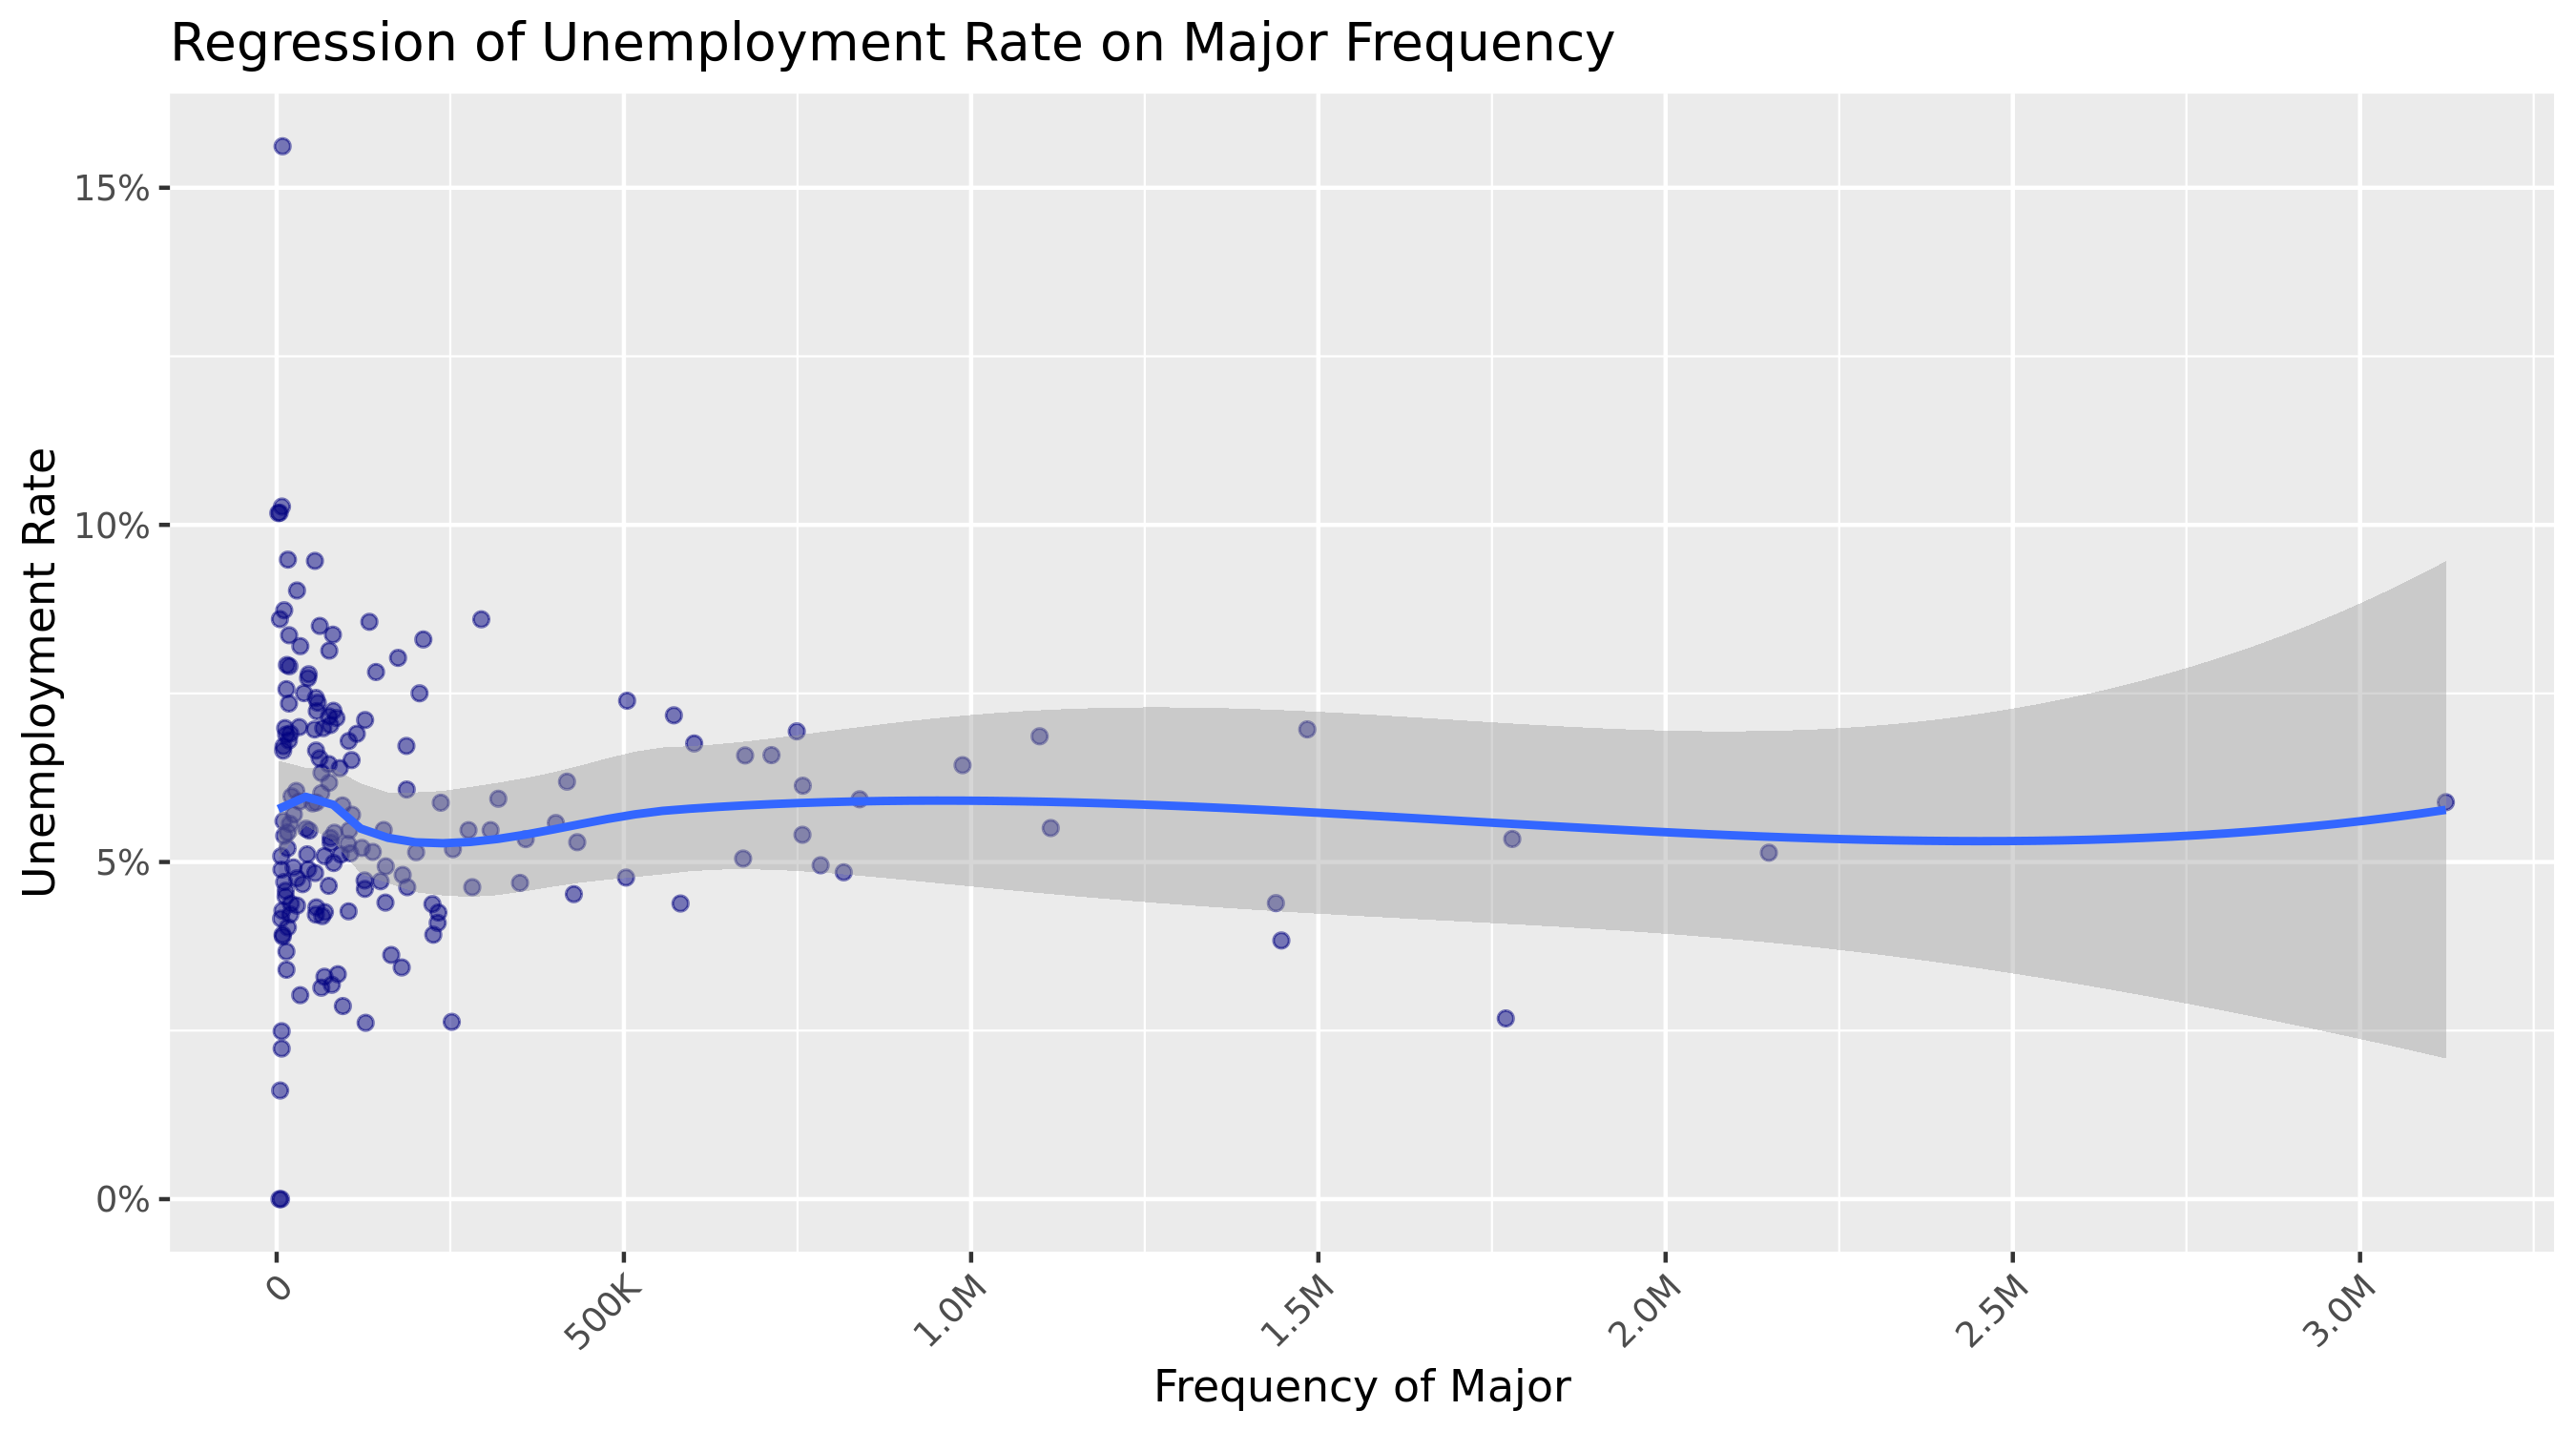

In [18]:
options(repr.plot.width=9, repr.plot.height=5, repr.plot.res = 300)

unemp = ggplot(majors, aes(x = Total, y = Unemployment_rate))+
    geom_point(color='navy blue', alpha = 0.5)+
    geom_smooth()+
    scale_x_continuous(breaks = seq(0, max(majors$Total), by = 500000))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    labs(title = "Regression of Unemployment Rate on Major Frequency",
       x = "Frequency of Major",
       y = "Unemployment Rate") +
    scale_x_continuous(breaks = seq(0, max(top_10$Total), by = 500000),labels = scales::label_number_si()) +
    scale_y_continuous(labels = scales::percent_format(scale = 100))


#'creating a new scale for x to be expressed in terms of millions of individuals -'
#'a note will pop up about this when the code is run but it is nothing to worry about :)'

unemp

## So this relatively flat line seems to hint at an answer to the question 'Does increased popularity of a major decrease unemployment? Not necessarily! The above plot does NOT appear to show a positive correlation between a major's commonality and unemployment rate. 

### Now, let's further examine this question of popularity by comparing the earning potentials of the various categories of majors. We will do this by graphing boxplots of the median salaries for each:

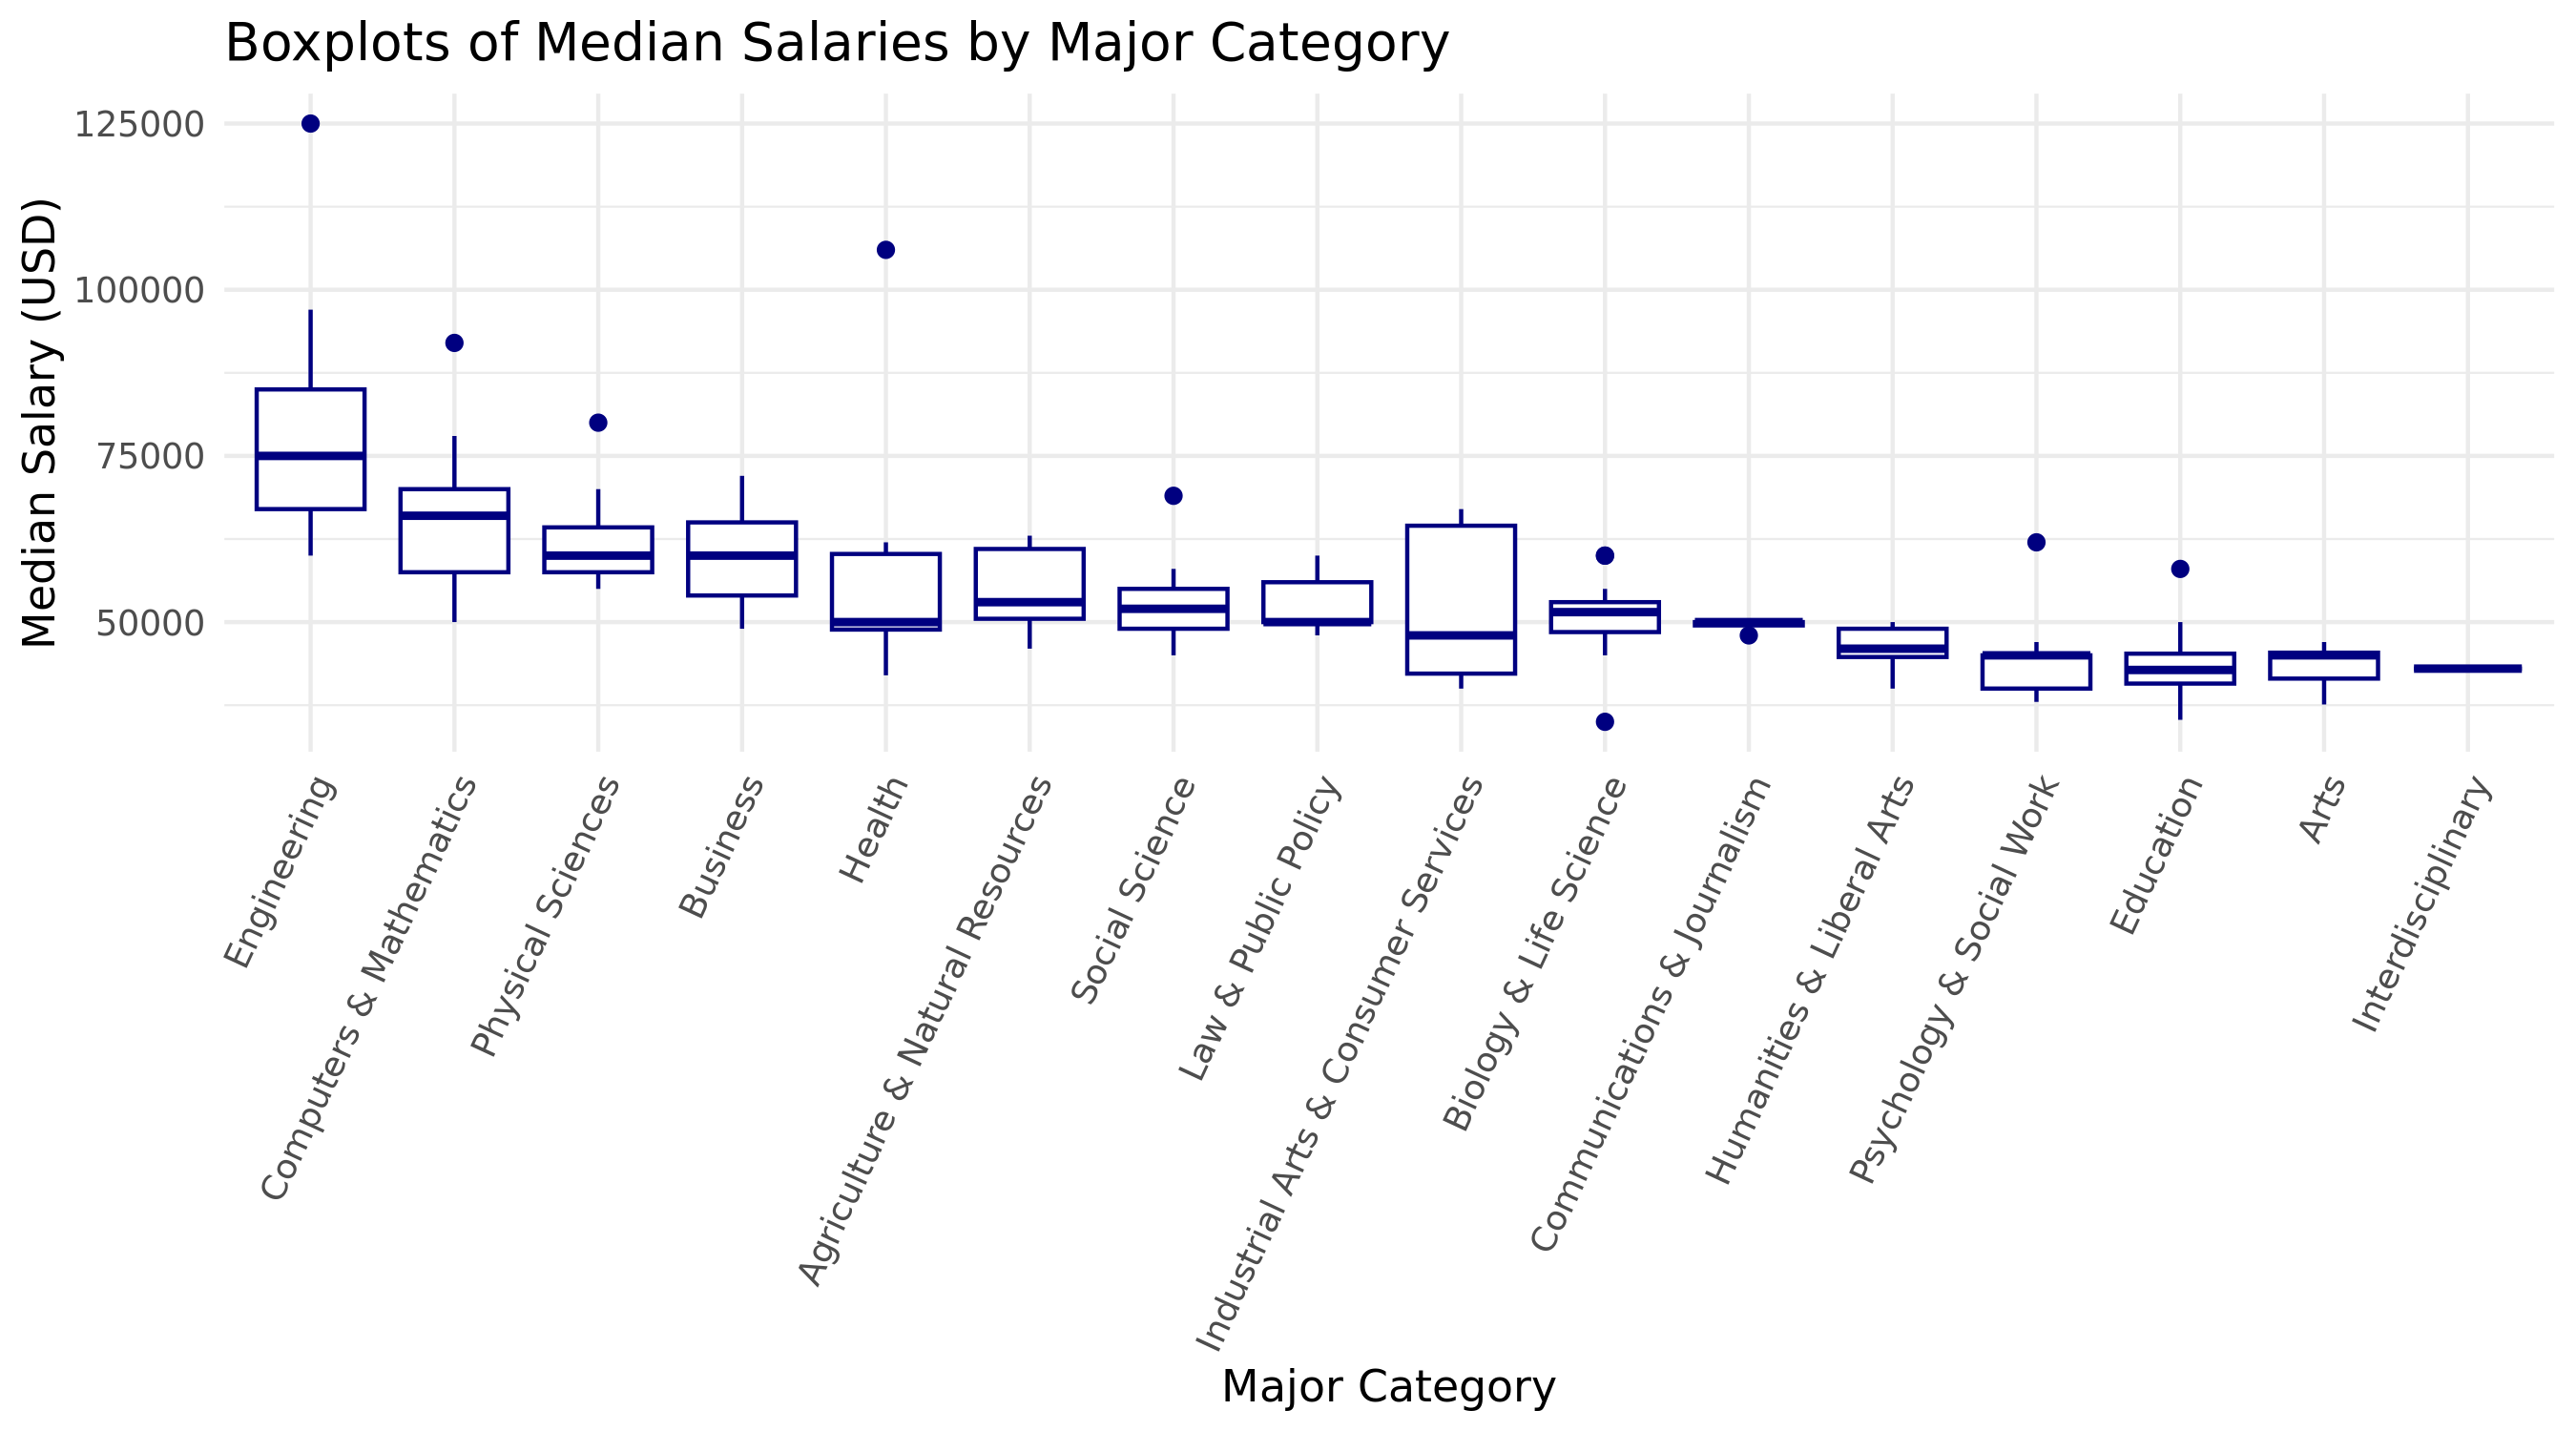

In [11]:
#reorder median of major categories so the boxplots are in descending order
majors$Major_category <- reorder(majors$Major_category, -majors$Median)

ggplot(majors, aes(x = Major_category, y = Median)) +
  geom_boxplot(color = 'navy blue') +
  labs(title = "Boxplots of Median Salaries by Major Category",
       x = "Major Category",
       y = "Median Salary (USD)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1))

### It is not surprising that majors in the Engineering and Computer Categories carry the highest median salaries in this data, although they both show far more variation (higher IQR) than most of the other major categories displayed here. However, it is interesting that the categories of engineering and computer science topped the salary index but not the popularity index. This could suggest that there is some potential negative correlation between major catrgory and salary. However, a more scientific investigation would be needed to determine this.

### For now, it can be concluded that choosing a more popular major in college will not necessarily hurt your chance of employment, but choosing a less popular major could be a bellwether for future higher salary if it is more on the niche side.